<a href="https://colab.research.google.com/github/simplifique-treinamentos/curso-intro-python/blob/main/Exercicio_Viz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Visualização de dados com Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns #biblioteca para gerar gráficos

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

## 1.1) Carrego o dataset

In [2]:
caminho = 'https://raw.githubusercontent.com/simplifique-treinamentos/datasets/master/hearts_processed_cleveland.csv'

* **sex**: 1 = male; 0 = female
* **cp** - chest pain (1:typical angina; 2:atypical angina; 3:non-anginal pain; 4:asymptomatic)
* **trestbps** - resting blood pressure (in mm Hg on admission to the hospital))
* **cho**l - serum cholestoral in mg/dl
* **fbs** - fasting blood sugar > 120 mg/dl - 1 = true; 0 = false
* **restecg** - 0:normal; 1:having ST-T wave abnormality; 2:showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach** - maximum heart rate achieved
* **exang**: exercise induced angina (1 = yes; 0 = no)
* **oldpeak** - ST depression induced by exercise relative to rest
* **slope**: 1: upsloping; 2:flat; 3:downsloping
* **ca**: number of major vessels (0-3) colored by flourosopy
* **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
* **num**: diagnosis of heart disease

In [4]:
df_cvd = pd.read_csv(caminho, header=0, sep=";" , decimal=".")
df_cvd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df_cvd.shape

(303, 14)

## 1.2) Histograma

<Axes: xlabel='age', ylabel='Count'>

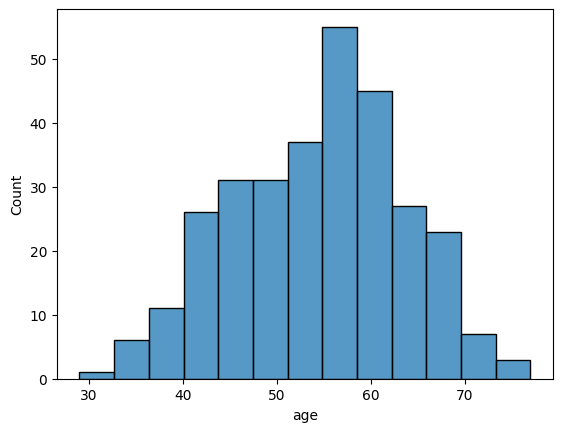

In [6]:
sns.histplot(data=df_cvd, x="age")

## 1.3) Boxplot

In [10]:
df_cvd['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [8]:
#Recategorizo a variável de desfecho num (0-:nomal, 1-N- anormal)
df_cvd['cvd'] = pd.cut(x=df_cvd['num'],
                            bins=[0, 0.9, 5],
                            labels=['0', '1'],
                            include_lowest= True
                          )

df_cvd['cvd'].value_counts()

0    164
1    139
Name: cvd, dtype: int64

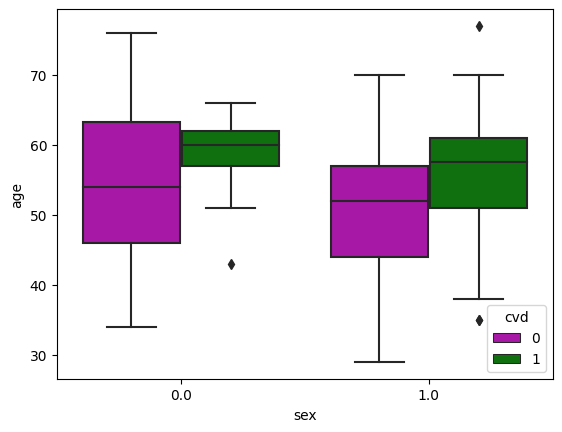

In [12]:
sns.boxplot(x="sex", y="age",
            hue="cvd", palette=["m","g"],
            data=df_cvd
            );

## 1.4) Heatmap - Mapa de calor

Primeiro, uso o método corr() do pandas para calcular o valor da correlação entre as variáveis.

In [17]:
#Excluo as variáveis categóricas da análise
df_corr = df_cvd.drop(['cvd','num','sex','cp','restecg','exang', 'slope', 'ca', 'thal'],axis=1).corr(method="pearson").abs()
df_corr

,age,trestbps,chol,fbs,thalach,oldpeak
age,1.000000,0.284946,0.208950,0.118530,0.393806,0.203805
trestbps,0.284946,1.000000,0.130120,0.175340,0.045351,0.189171
chol,0.208950,0.130120,1.000000,0.009841,0.003432,0.046564
fbs,0.118530,0.175340,0.009841,1.000000,0.007854,0.005747
thalach,0.393806,0.045351,0.003432,0.007854,1.000000,0.343085
oldpeak,0.203805,0.189171,0.046564,0.005747,0.343085,1.000000


Exibo o mapa de calor. <br />
Neste gráfico, as cores mais claras indicam maior correlação. <br />
Melhoraremos ainda mais este gráfico...

<Axes: >

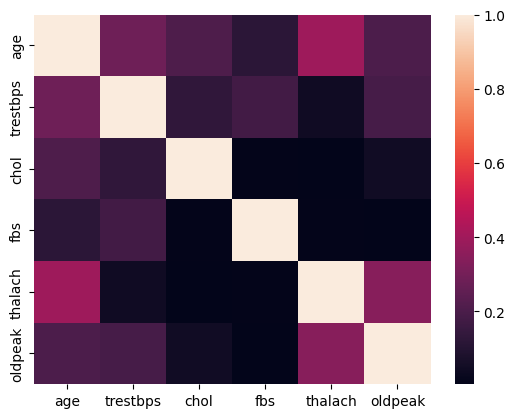

In [18]:
sns.heatmap(df_corr)

In [19]:
#Crio uma matriz de valores "False" para ocultar a parte diagonal superior do gráfico
mascara = np.zeros_like(df_corr, dtype=bool)

#Coloco o valor true na parte superior diagonal da matriz
mascara[np.triu_indices_from(mascara)] = True
mascara

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

<Axes: >

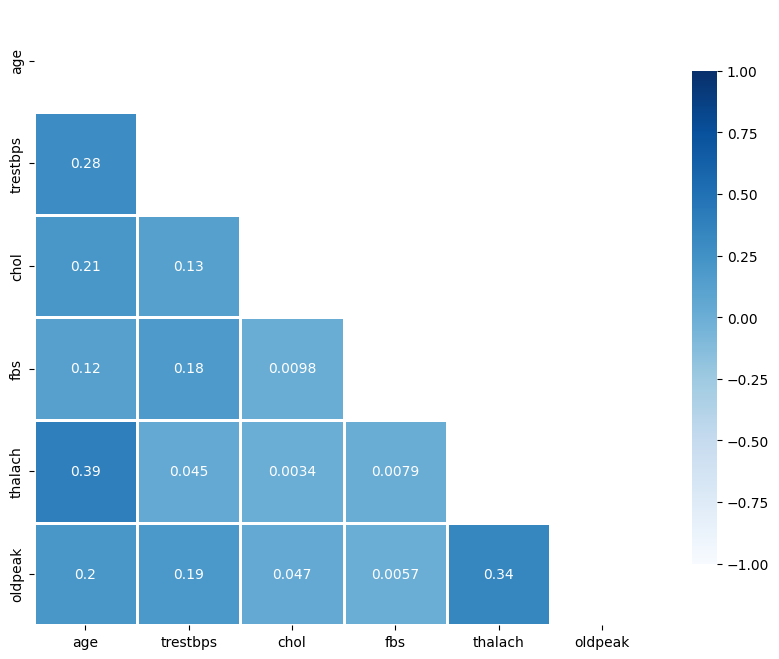

In [20]:
#Defino o tamanho da figura (em polegadas)
f, ax = plt.subplots(figsize=(10,8))

#Gero o mapa de calor
sns.heatmap(df_corr,                    #dataframe de correlações
            mask=mascara,               #mascara para ocultar a parte diagonal superior
            cmap="Blues",               #Mapa de Cor (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
            linewidths = 0.8,            #Espessura das linhas
            cbar_kws = {"shrink": .8},  #diminuo o tamanho das legendas
            annot=True,                 #escreve o valor das correlações dentro das caixas do gráfico
            vmin=-1,                    #Valor mínimo para exibição
            vmax=1                      #Valor máximo para exibição
            )

Perceba que na primeira linha e na última coluna, ficou em branco.<br/>
Vamos melhorar isso logo abaixo...

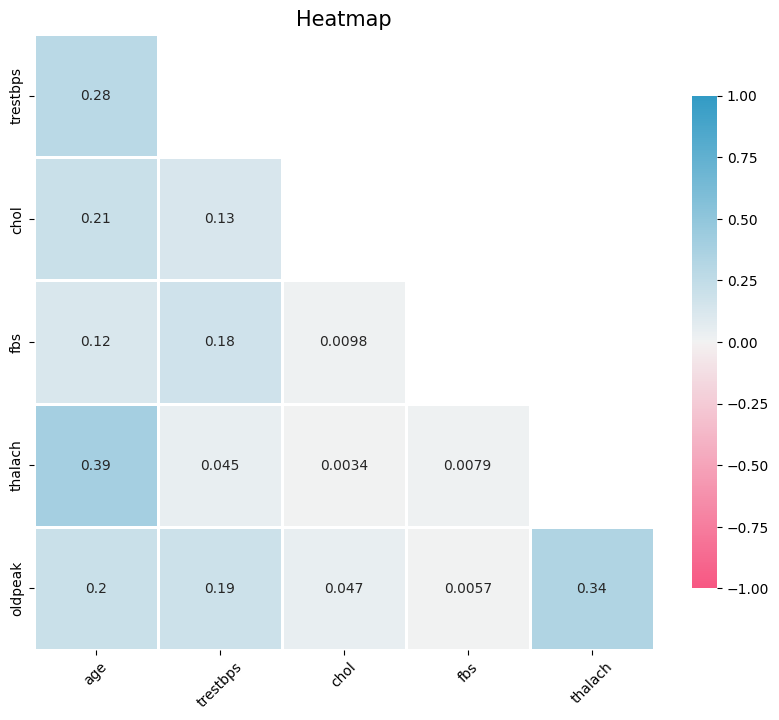

In [21]:
#Defino o tamanho da figura (em polegadas)
f, ax = plt.subplots(figsize=(10,8))

#Crio uma matriz de valores "False" para o dataframe de correlações
mascara_corr = np.zeros_like(df_corr, dtype=bool)

#Coloco o valor true na parte superior diagonal da matriz
mascara_corr[np.triu_indices_from(mascara_corr)] = True

#Removo a primeira linha e a última coluna da mascara fazendo o slicing
mascara_corr = mascara_corr[1:,:-1]

#Crio outro dataframe para copiar somente os valores que serão plotados no gráfico
df_corr2 = df_corr.iloc[1:,:-1].copy()

#utilizo outro mapa de cores para suavizar o gráfico
mapa_cor = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

#Gero o mapa de calor
sns.heatmap(df_corr2,                   #dataframe de correlações
            mask=mascara_corr,               #mascara para ocultar a parte diagonal superior
            cmap=mapa_cor,              #Mapa de Cor (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
            linewidths = 1,             #Espessura das linhas
            cbar_kws = {"shrink": .8},  #diminuo o tamanho das legendas
            annot=True,                 #escreve o valor das correlações dentro das caixas do gráfico
            vmin=-1,                    #Valor mínimo para exibição
            vmax=1                      #Valor máximo para exibição
            )

#Crio um título para o gráfico
plt.title("Heatmap", size=15)

#Inclino o texto do eixo x
plt.xticks(rotation=45)

#Finalmente, exibo o gráfico
plt.show()

## 1.5) Matriz de dispersão

Gero a matriz de dispersão. <br />
Obs: pode demorar um tempinho...

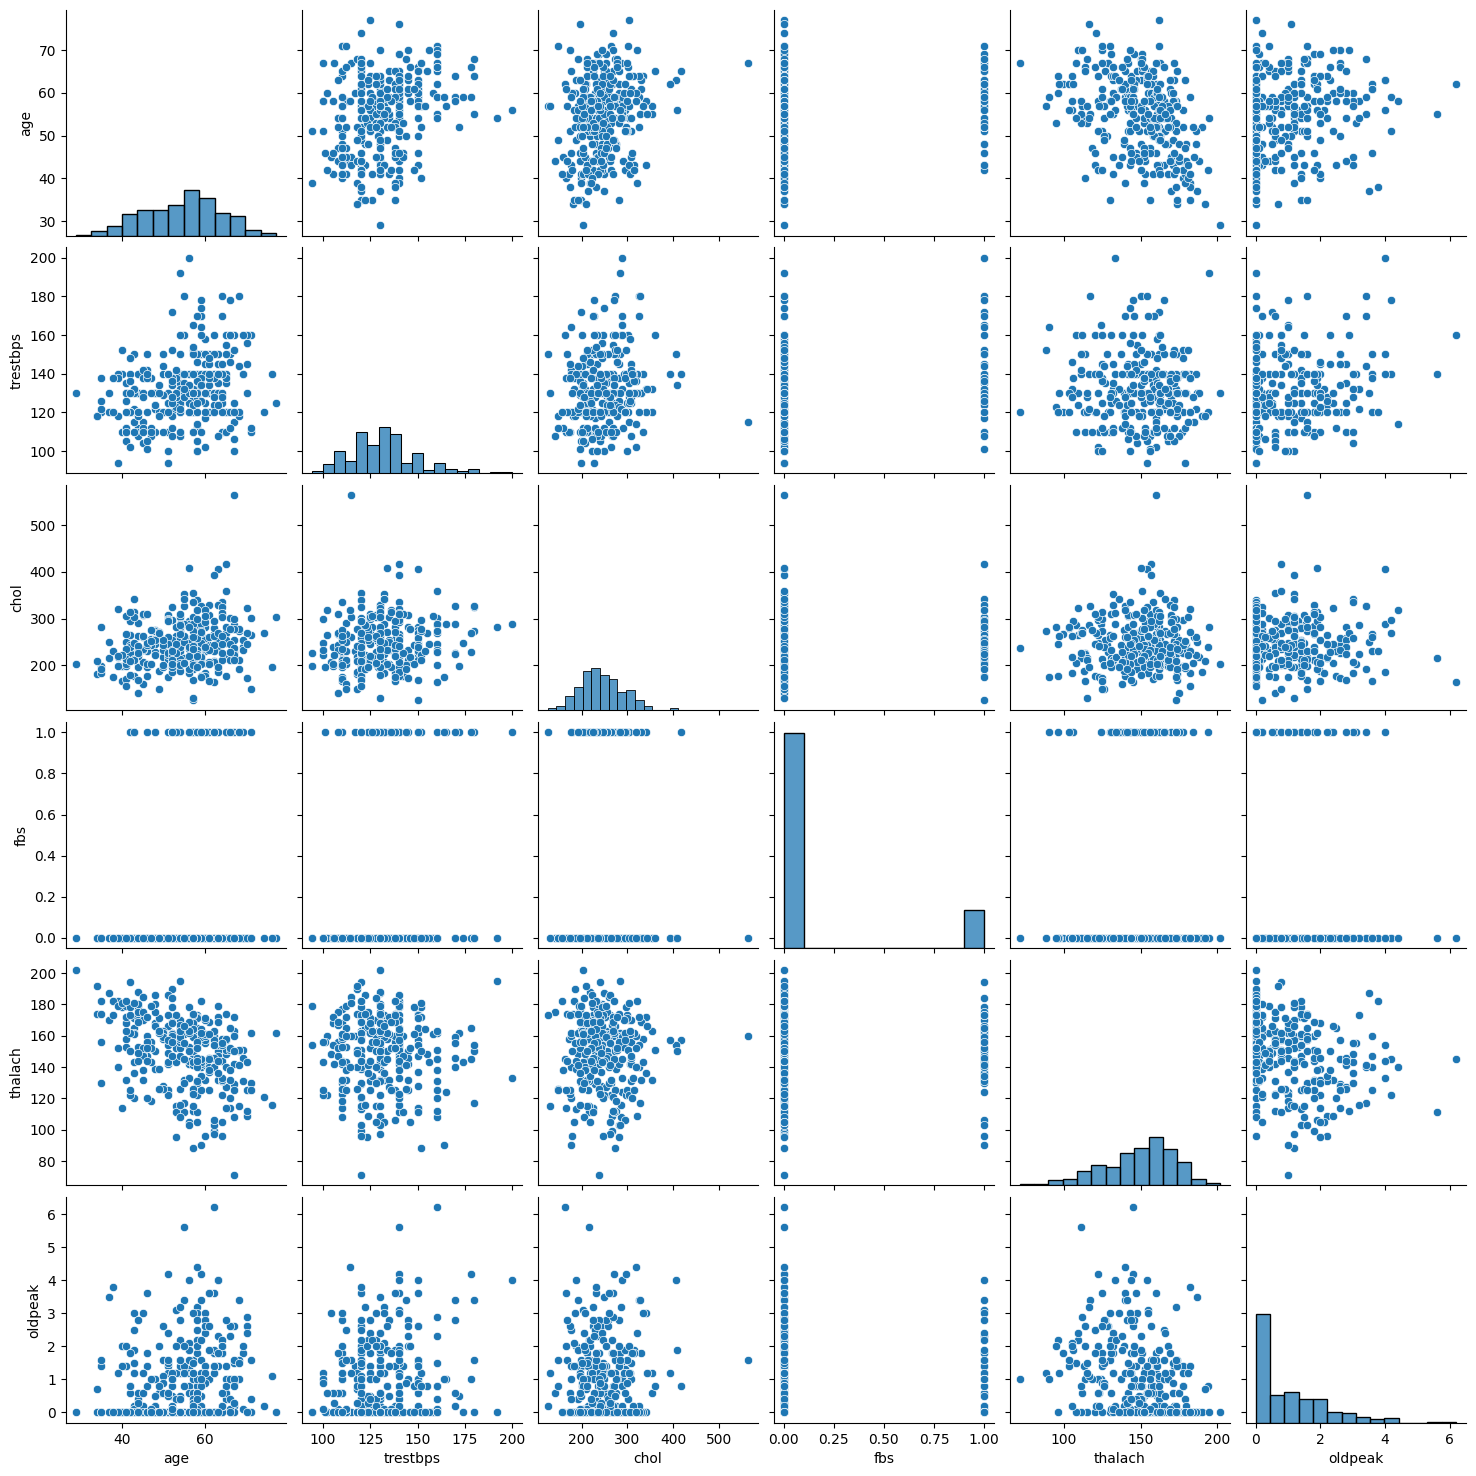

In [22]:
sns.pairplot(df_cvd.drop(['cvd','num','sex','cp','restecg','exang', 'slope', 'ca', 'thal'], axis=1))

### 1.5.1) Matriz de dispersão om destaque para outra variável.
Desta forma é possível enxergar subgrupos e comportamentos diferentes

In [25]:
df_cvd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,cvd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


Crio uma matriz de dispersão para analisar os subgrupos por desfecho

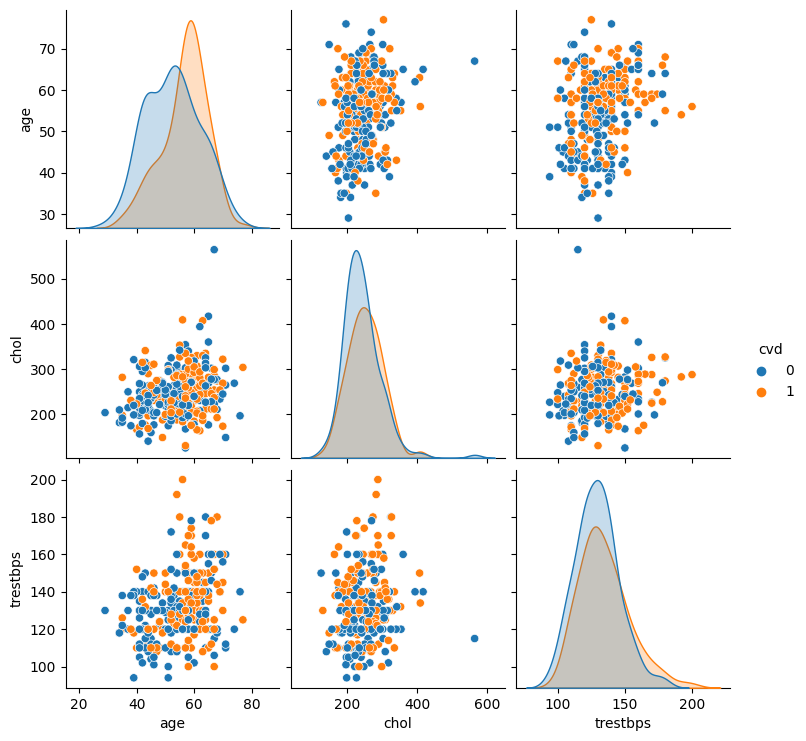

In [30]:
sns.pairplot(df_cvd [['age','chol','trestbps','cvd']],
             hue='cvd'
            )